In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
temp = pd.DataFrame(np.array([[0,1,2], iris.target_names]).T, columns=['label', 'name'])
temp.label = temp.label.astype('int')
df = pd.merge(df, temp, on='label', how='left') 
df = df[df.label.isin([0,1])]
df.columns = pd.Series(df.columns).str.replace(' \(cm\)', '')
df.columns = ['_'.join(x for x in col) for col in df.columns.str.split(' ')] 
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,label,name
95,5.7,3.0,4.2,1.2,1,versicolor
96,5.7,2.9,4.2,1.3,1,versicolor
97,6.2,2.9,4.3,1.3,1,versicolor
98,5.1,2.5,3.0,1.1,1,versicolor
99,5.7,2.8,4.1,1.3,1,versicolor


<br>
Build samples

In [4]:
samples = np.array([df.sepal_length, df.sepal_width]).T
samples.shape

(100, 2)

In [5]:
samples[:5,:]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

<br>
<br>
<br>
<br>

### K-means

\begin{align}
\Omega = \min\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_j - \mu_i||^2) \\
\mu_0 = \text{one of} \space x_i \\
\end{align}

<br>
<br>
<br>
<br>

<br>
Define Distance

\begin{aligned}
d(\mathbf {p} ,\mathbf {q} )=d(\mathbf {q} ,\mathbf {p} )&={{(q_{1}-p_{1})^{2}+(q_{2}-p_{2})^{2}+\cdots +(q_{n}-p_{n})^{2}}}\\[8pt]&={{\sum _{i=1}^{n}(q_{i}-p_{i})^{2}}}.
\end{aligned}

In [6]:
squared_euclidean_distance = lambda a, b: np.sum(np.power(a - b, 2))

<br>
<br>
<br>
<br>

In [7]:
def kmeans(samples, n_clusters, metric='auto', max_iter=100, init='random', random_state='random'):
    centroids_path = []
    label_path = []
    loss_path = []
    
    if random_state != 'random':
        np.random.seed(random_state)
    if init == 'random':
        init = np.random.randint(len(samples), size=n_clusters)
    else:
        pass
    centroids = [samples[x] for x in init]
    dist = np.zeros((len(samples), n_clusters))

    for i in range(max_iter):
        for j, c in enumerate(centroids):
            if metric == 'auto':
                dist[:,j] = [squared_euclidean_distance(c, val) for val in samples]
            else:
                dist[:,j] = [metric(c, val) for val in samples]
        label = np.array([np.argmin(d) for d in dist])
        label_path.append(label)
        centroids_path.append(centroids)

        # update centroids
        centroids = []
        for k in range(n_clusters):
            cluster = samples[label == k]
            centroids.append(np.mean(cluster, axis=0))
        
        # calculate loss
        inertia = np.sum(np.min(d) for d in dist)
        loss_path.append(inertia)
        
        # termination condition
        if np.array_equal(centroids_path[-1], centroids):
            break
    
    print('{} iterations'.format(i+1))
    return centroids, label, inertia, centroids_path, label_path, loss_path

In [8]:
k = 2
centroids, label, inertia, centroids_path, label_path, loss_path = kmeans(samples=samples,
                                                                         n_clusters=2,
                                                                         metric='auto',
                                                                         max_iter=100,
                                                                         init='random',
                                                                         random_state=0)

6 iterations


In [9]:
cnt = 0

1


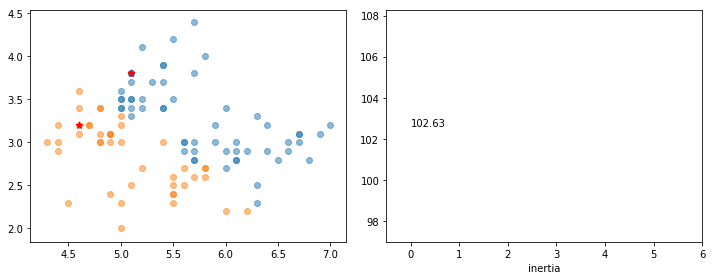

In [10]:
if cnt != len(centroids_path):
    res = df.copy()
    res.label = label_path[cnt]
    centroid = np.array(centroids_path[cnt])
    print(cnt+1)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
for lb in range(k):
    plt.scatter(x='sepal_length', y='sepal_width', data=res[res.label==lb], alpha=.5)
plt.scatter(x=centroid[:,0], y=centroid[:,1], marker='*', c='r', s=50)
plt.subplot(1,2,2)
plt.plot(np.arange(cnt+1), loss_path[:cnt+1])
plt.xlim(-.5, len(centroids_path))
plt.text(x=0, y=loss_path[cnt], s=round(loss_path[cnt], 3))
plt.xlabel('inertia')
plt.tight_layout()
plt.show()
cnt += 1

<br>
Scikit-Learn  
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [11]:
from sklearn.cluster import KMeans

In [12]:
k=2
km = KMeans(n_clusters=k, init="random", max_iter=100, random_state=0).fit(samples)

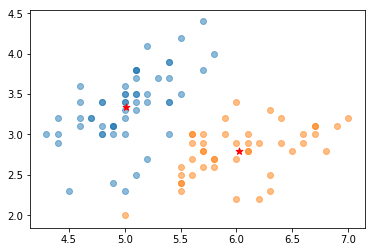

In [13]:
res = df.copy()
res.label = km.labels_
for lb in range(k):
    plt.scatter(x='sepal_length', y='sepal_width', data=res[res.label==lb], alpha=.5)
plt.scatter(x=km.cluster_centers_[:,0], y=km.cluster_centers_[:,1], marker='*', c='r', s=50)
plt.show()

<br>
<br>
<br>
<br>

#### Distance Metrices

Euclidean Distance

\begin{aligned}
d(\mathbf {p} ,\mathbf {q} )=d(\mathbf {q} ,\mathbf {p} )&={\sqrt {(q_{1}-p_{1})^{2}+(q_{2}-p_{2})^{2}+\cdots +(q_{n}-p_{n})^{2}}}\\[8pt]&={\sqrt {\sum _{i=1}^{n}(q_{i}-p_{i})^{2}}}.
\end{aligned}

In [14]:
euclidean_distance = lambda a, b: np.sqrt(np.sum(np.power(a - b, 2)))

In [15]:
centroids, label, inertia, centroids_path, label_path, loss_path = kmeans(samples=samples,
                                                                         n_clusters=2,
                                                                         metric=euclidean_distance,
                                                                         max_iter=100,
                                                                         init='random',
                                                                         random_state=0)

6 iterations


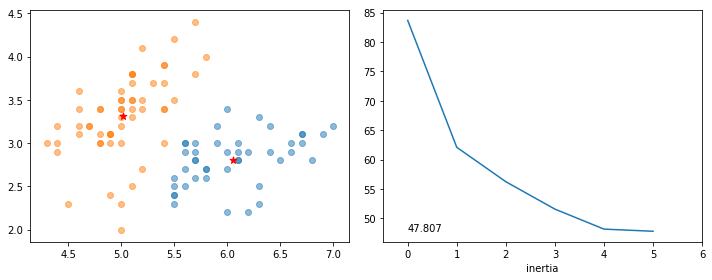

In [16]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
res = df.copy()
res.label = label
for lb in range(k):
    plt.scatter(x='sepal_length', y='sepal_width', data=res[res.label==lb], alpha=.5)
plt.scatter(x=np.array(centroids)[:,0], y=np.array(centroids)[:,1], marker='*', c='r', s=50)
plt.subplot(1,2,2)
plt.plot(np.arange(len(loss_path)), loss_path)
plt.xlim(-.5, len(loss_path))
plt.text(x=0, y=loss_path[-1], s=round(loss_path[-1], 3))
plt.xlabel('inertia')
plt.tight_layout()
plt.show()

<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>

<br>
Cosine Distance

\begin{align}
d(\mathbf {p} ,\mathbf {q} ) &= 1 - \cos(\theta ) \\
&= 1 - \frac{\mathbf {a} \cdot \mathbf {b}} {\|\mathbf {a} \|\|\mathbf {b} \|} \\
\end{align}

In [17]:
def cosine_distance(a, b):
    magnitude_a = euclidean_distance(np.zeros(2), a)
    magnitude_b = euclidean_distance(np.zeros(2), b)
    inner_product = np.dot(a, b)
    return 1 - (inner_product / (magnitude_a * magnitude_b))

In [18]:
centroid, label, inertia, centroids_path, label_path, loss_path = kmeans(samples=samples,
                                                                         n_clusters=2,
                                                                         metric=cosine_distance,
                                                                         max_iter=100,
                                                                         init='random',
                                                                         random_state=0)

4 iterations


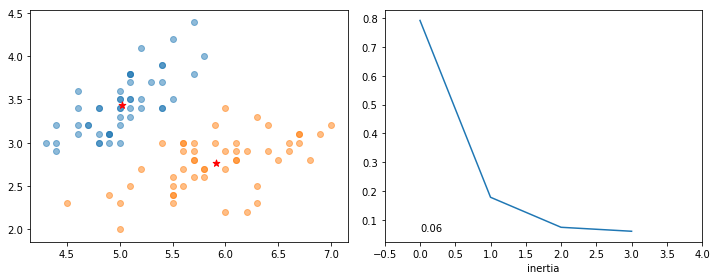

In [19]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
res = df.copy()
res.label = label
for lb in range(k):
    plt.scatter(x='sepal_length', y='sepal_width', data=res[res.label==lb], alpha=.5)
plt.scatter(x=np.array(centroid)[:,0], y=np.array(centroid)[:,1], marker='*', c='r', s=50)
plt.subplot(1,2,2)
plt.plot(np.arange(len(loss_path)), loss_path)
plt.xlim(-.5, len(loss_path))
plt.text(x=0, y=loss_path[-1], s=round(loss_path[-1], 3))
plt.xlabel('inertia')
plt.tight_layout()
plt.show()

<br>
<br>
<br>
<br>

### DBSCAN
Density-Based Spatial Clustering of Applications with Noise  
https://en.wikipedia.org/wiki/DBSCAN

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/800px-DBSCAN-Illustration.svg.png'  height="300" width="300">

- Find the ε (eps) neighbors of every point, and identify the core points with more than minPts neighbors.
- Find the connected components of core points on the neighbor graph, ignoring all non-core points.
- Assign each non-core point to a nearby cluster if the cluster is an ε (eps) neighbor, otherwise assign it to noise.

<br>
<br>
<br>
<br>

\begin{align}
F(c_i \space|\space \epsilon, minPts) 
\end{align}

<br>
<br>
<br>
<br>

In [20]:
def dbscan(samples, eps, min_samples, metric='euclidean'):
    if metric == 'euclidean':
        metric = euclidean_distance
    elif metric == 'cosine':
        metric = cosine_distance
    label = np.zeros(len(samples))
    c_count = 0

    seed = {}
    noise = []

    for i, val in enumerate(samples):
        # calculate distance
        dist = np.array([metric(val, x) for x in samples])
        #density check
        valid_idx = np.argwhere(dist < eps).T[0]
        valid_cnt = len(valid_idx)
        if valid_cnt < min_samples:
            noise.append(i)
        else:
            seed.update({i:valid_idx})

    # identify noise
    label[noise] = - 1

    # label clusters
    key_cand = list(seed.keys())
    # for key in key_cand:
    while(len(key_cand) != 0):
        key = key_cand[0]
        neighbors = seed[key]
        
        cnt = 0
        while cnt != len(np.unique(neighbors)):
            try:
                to_add = np.array(list(set(seed[neighbors[cnt]]) - set(neighbors)))
            except:
                # label border
                label[neighbors[cnt]] = c_count
            if len(to_add) != 0:
                neighbors = np.append(neighbors, to_add)
            cnt += 1

        label[neighbors] = c_count
        c_count += 1
        # ignore indices visited
        key_cand = list(set(key_cand) - set(neighbors))
        
    return label, noise, seed

In [21]:
label, noise, seed = dbscan(samples=samples,
                       eps=0.4,
                       min_samples=13,
                       metric='euclidean')

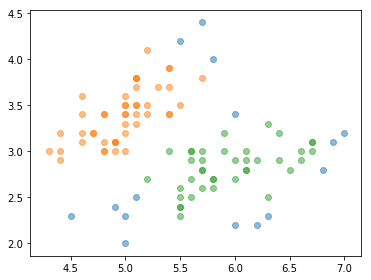

In [22]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
res = df.copy()
res.label = label
for lb in np.unique(label):
    plt.scatter(x='sepal_length', y='sepal_width', data=res[res.label==lb], alpha=.5)
plt.tight_layout()
plt.show()

<br>
Scikit-Learn  
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [23]:
from sklearn.cluster import DBSCAN

In [24]:
db = DBSCAN(eps=0.4, min_samples=13, metric='euclidean').fit(samples)

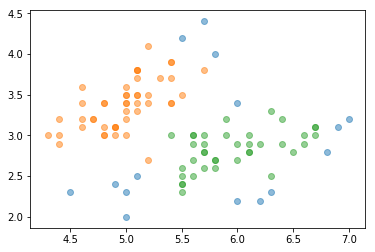

In [25]:
res = df.copy()
res.label = db.labels_
for lb in np.unique(db.labels_):
    plt.scatter(x='sepal_length', y='sepal_width', data=res[res.label==lb], alpha=.5)
plt.show()